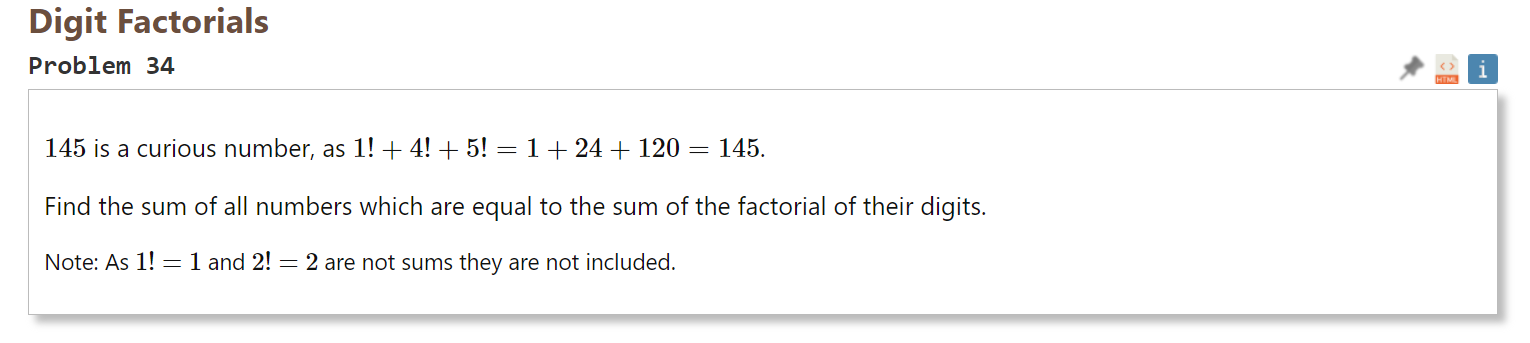

In [6]:
def factorial(n):
    if n == 1 or n == 0:
        return 1
    total = n
    for i in range(2, n):
        total *= i
    return total

In [8]:
factorial(9)

362880

9! = 362880, there will be an upper bound to how many digits we have to check when digits*9! < 10...0 where there are digits - 1 0's,  
another way to think of this is eventually, when you add another digit, it will times the number by 10, so 2 digits is minimum 10 goes to 3 digits is a minimum 100 means the next factorial needs to be at least = 90, we have a maximum a factorial we can add (9!) so eventually adding another digit will increase the number so much not even 9! brings it to the minimum of the next number of digits.

$10^{d-1}$ is the minumum a number of d digits can be (e.g 2 digits = $10^{2-1} = 10$),  
so our upper bound for d is when $d*9! < 10^{d-1}$, there is usually not an easy algebraic solution to exponential = linear so will try by changing d until we find it  

In [10]:
for d in range(2, 100):
    fac = d*362880
    dig = 10**(d-1)
    print(f'{d=}')
    print(f'{d}*9! = {fac}')
    print(f'10^{d-1} = {dig}')
    end = fac < dig
    if end:
        print(f'{d} is the UB digits')
        break
    print('==========================')

d=2
2*9! = 725760
10^1 = 10
d=3
3*9! = 1088640
10^2 = 100
d=4
4*9! = 1451520
10^3 = 1000
d=5
5*9! = 1814400
10^4 = 10000
d=6
6*9! = 2177280
10^5 = 100000
d=7
7*9! = 2540160
10^6 = 1000000
d=8
8*9! = 2903040
10^7 = 10000000
8 is the UB digits


so will only consider numbers of 7 digits and below

Will see whether storing all the digit factorials and looking up the sum of the digits in the number or calculating them all is faster (without storing)

# With Storing

In [16]:
factorials = {f'{d}':factorial(d) for d in range(0, 10)}
factorials

{'0': 1,
 '1': 1,
 '2': 2,
 '3': 6,
 '4': 24,
 '5': 120,
 '6': 720,
 '7': 5040,
 '8': 40320,
 '9': 362880}

In [19]:
def dig_fac_stored():
    factorials = {f'{d}':factorial(d) for d in range(0, 10)}
    total = 0
    # Only sums of digits
    for num in range(10, 10_000_000):
        str_num = str(num)
        if sum([factorials[d] for d in str_num]) == num:
            total += num
    return total

In [21]:
%%timeit
dig_fac_stored()

145
40585
145
40585
145
40585
145
40585
145
40585
145
40585
145
40585
145
40585
8.87 s ± 247 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Without Storing

In [23]:
def dig_fac():
    total = 0
    # Only sums of digits
    for num in range(10, 10_000_000):
        str_num = str(num)
        if sum([factorial(int(d)) for d in str_num]) == num:
            print(num)
            total += num
    return total

In [25]:
%%timeit
dig_fac()

145
40585
145
40585
145
40585
145
40585
145
40585
145
40585
145
40585
145
40585
34.7 s ± 997 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
